<a href="https://colab.research.google.com/github/susu1021/Assignment-k8/blob/main/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<!-- TODO(b/319266067) remove temporary advert after a few weeks. -->
<div class="markdown-google-sans">
  <h2>&#40;New&#41; Try the Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  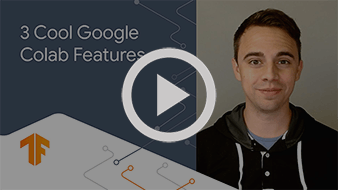
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or ‘Colaboratory’, allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a <strong>student</strong>, a <strong>data scientist</strong> or an <strong>AI researcher</strong>, Colab can make your work easier. Watch <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introduction to Colab</a> to find out more, or just get started below!

<div class="markdown-google-sans">

## <strong>Getting started</strong>
</div>

The document that you are reading is not a static web page, but an interactive environment called a <strong>Colab notebook</strong> that lets you write and execute code.

For example, here is a <strong>code cell</strong> with a short Python script that computes a value, stores it in a variable and prints the result:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Algorithm	Accuracy	Time (s)
-----------------------------------
GMM		0.0105		0.0234
EM		0.0105		0.1639
Hierarchical	0.0000		0.0101
KNN		1.0000		0.0213


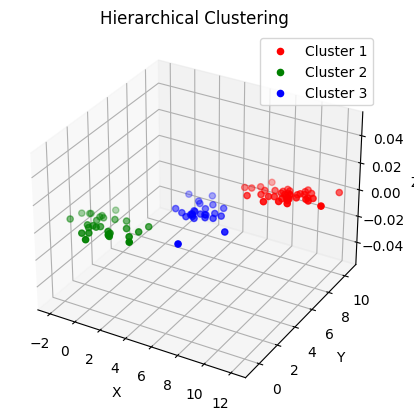

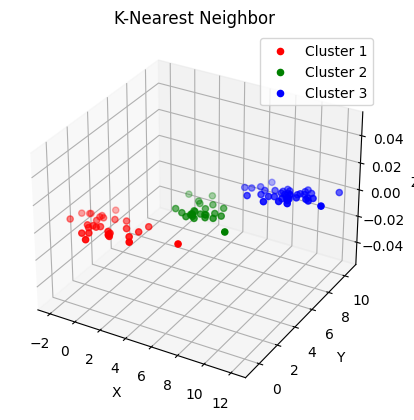

In [5]:
import numpy as np
from sklearn.datasets import make_spd_matrix
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
import time

# Function to generate random data points from Gaussian distribution
def generate_data_points(mean, cov_matrix, num_points):
    return np.random.multivariate_normal(mean, cov_matrix, num_points)

# Function to shuffle the ground truth dataset
def shuffle_dataset(D1, D2, D3):
    dataset = np.concatenate((D1, D2, D3))
    labels = np.concatenate((np.zeros(len(D1)), np.ones(len(D2)), 2 * np.ones(len(D3))))
    idx = np.random.permutation(len(dataset))
    return dataset[idx], labels[idx]

# Define the parameters for the three Gaussian distributions
mu1 = np.array([1, 1])
mu2 = np.array([5, 5])
mu3 = np.array([9, 9])

cov1 = make_spd_matrix(2)  # Covariance matrix for class 1
cov2 = make_spd_matrix(2)  # Covariance matrix for class 2
cov3 = make_spd_matrix(2)  # Covariance matrix for class 3

# Generate random data points
D1 = generate_data_points(mu1, cov1, 30)
D2 = generate_data_points(mu2, cov2, 25)
D3 = generate_data_points(mu3, cov3, 40)

# Shuffle the ground truth dataset
randomized_dataset, labels = shuffle_dataset(D1, D2, D3)

# Gaussian Mixture Model
start_time = time.time()
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(randomized_dataset)
gmm_labels = gmm.predict(randomized_dataset)
gmm_accuracy = accuracy_score(labels, gmm_labels)
gmm_time = time.time() - start_time

# Expectation-Maximization Model (using KMeans)
start_time = time.time()
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(randomized_dataset)
em_labels = kmeans.labels_
em_accuracy = accuracy_score(labels, em_labels)
em_time = time.time() - start_time

# Hierarchical Clustering
start_time = time.time()
hc = AgglomerativeClustering(n_clusters=3)
hc_labels = hc.fit_predict(randomized_dataset)
hc_accuracy = accuracy_score(labels, hc_labels)
hc_time = time.time() - start_time

# K-Nearest Neighbor
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(randomized_dataset, labels)
knn_labels = knn.predict(randomized_dataset)
knn_accuracy = accuracy_score(labels, knn_labels)
knn_time = time.time() - start_time

# Display the results
print("Algorithm\tAccuracy\tTime (s)")
print("-----------------------------------")
print(f"GMM\t\t{gmm_accuracy:.4f}\t\t{gmm_time:.4f}")
print(f"EM\t\t{em_accuracy:.4f}\t\t{em_time:.4f}")
print(f"Hierarchical\t{hc_accuracy:.4f}\t\t{hc_time:.4f}")
print(f"KNN\t\t{knn_accuracy:.4f}\t\t{knn_time:.4f}")
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to plot the clustered data in 3D
def plot_3d_clusters(dataset, labels, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = ['r', 'g', 'b']
    for i in range(3):
        ax.scatter(dataset[labels == i, 0], dataset[labels == i, 1], np.zeros_like(dataset[labels == i, 0]), c=colors[i], label=f'Cluster {i+1}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()
    plt.show()

# Plotting the results
plot_3d_clusters(randomized_dataset, hc_labels, 'Hierarchical Clustering')
plot_3d_clusters(randomized_dataset, knn_labels, 'K-Nearest Neighbor')

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut 'Command/Ctrl+Enter'. To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

Algorithm	Accuracy	Time (s)
-----------------------------------
GMM		0.0000		0.0683
Hierarchical	0.2526		0.0101
KNN		0.9895		0.0224


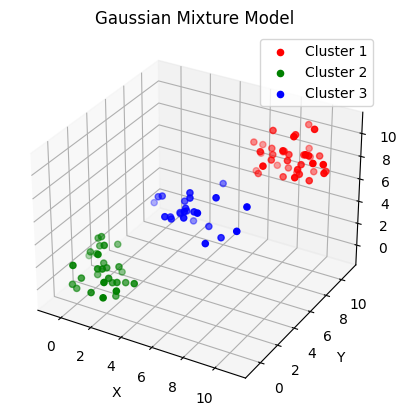

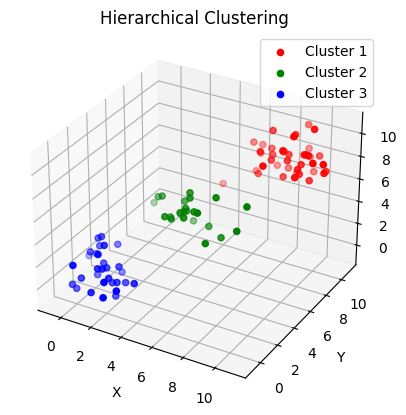

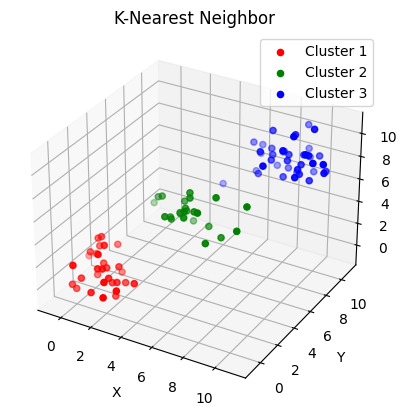

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Function to generate random data points from Gaussian distribution
def generate_data_points(mean, cov_matrix, num_points):
    return np.random.multivariate_normal(mean, cov_matrix, num_points)

# Function to shuffle the ground truth dataset
def shuffle_dataset(D1, D2, D3):
    dataset = np.concatenate((D1, D2, D3))
    labels = np.concatenate((np.zeros(len(D1)), np.ones(len(D2)), 2 * np.ones(len(D3))))
    idx = np.random.permutation(len(dataset))
    return dataset[idx], labels[idx]

# Define the parameters for the three Gaussian distributions
mu1 = np.array([1, 1, 1])
mu2 = np.array([5, 5, 5])
mu3 = np.array([9, 9, 9])

cov1 = np.diag([1, 1, 1])  # Covariance matrix for class 1
cov2 = np.diag([1, 1, 1])  # Covariance matrix for class 2
cov3 = np.diag([1, 1, 1])  # Covariance matrix for class 3

# Generate random data points
D1 = generate_data_points(mu1, cov1, 30)
D2 = generate_data_points(mu2, cov2, 25)
D3 = generate_data_points(mu3, cov3, 40)

# Shuffle the ground truth dataset
randomized_dataset, labels = shuffle_dataset(D1, D2, D3)

# Gaussian Mixture Model
start_time = time.time()
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(randomized_dataset)
gmm_labels = gmm.predict(randomized_dataset)
gmm_accuracy = accuracy_score(labels, gmm_labels)
gmm_time = time.time() - start_time

# Hierarchical Clustering
start_time = time.time()
hc = AgglomerativeClustering(n_clusters=3)
hc_labels = hc.fit_predict(randomized_dataset)
hc_accuracy = accuracy_score(labels, hc_labels)
hc_time = time.time() - start_time

# K-Nearest Neighbor
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(randomized_dataset, labels)
knn_labels = knn.predict(randomized_dataset)
knn_accuracy = accuracy_score(labels, knn_labels)
knn_time = time.time() - start_time

# Function to plot 3D clusters
def plot_3d_clusters(dataset, labels, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = ['r', 'g', 'b']
    for i in range(3):
        ax.scatter(dataset[labels == i, 0], dataset[labels == i, 1], dataset[labels == i, 2], c=colors[i], label=f'Cluster {i+1}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()
    plt.show()

# Displaying results
print("Algorithm\tAccuracy\tTime (s)")
print("-----------------------------------")
print(f"GMM\t\t{gmm_accuracy:.4f}\t\t{gmm_time:.4f}")
print(f"Hierarchical\t{hc_accuracy:.4f}\t\t{hc_time:.4f}")
print(f"KNN\t\t{knn_accuracy:.4f}\t\t{knn_time:.4f}")

# Plotting the results
plot_3d_clusters(randomized_dataset, gmm_labels, 'Gaussian Mixture Model')
plot_3d_clusters(randomized_dataset, hc_labels, 'Hierarchical Clustering')
plot_3d_clusters(randomized_dataset, knn_labels, 'K-Nearest Neighbor')


Algorithm	Accuracy	Time (s)
-----------------------------------
GMM		0.0000		0.0918
Hierarchical	0.2632		0.0088
KNN		1.0000		0.0516
EM		0.0000		0.0715


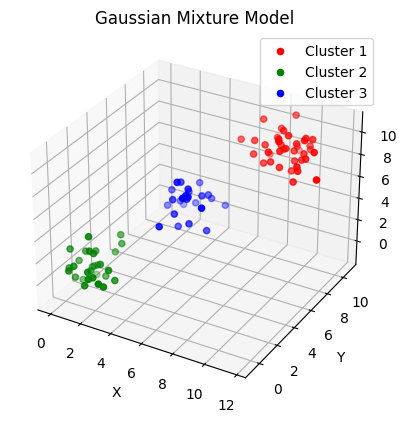

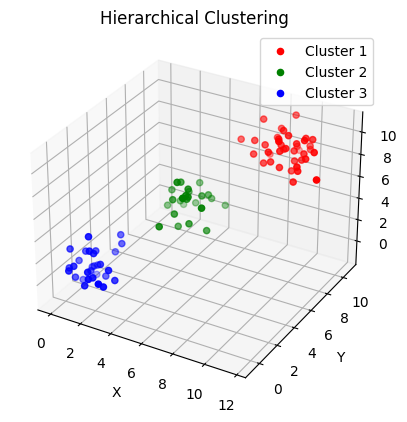

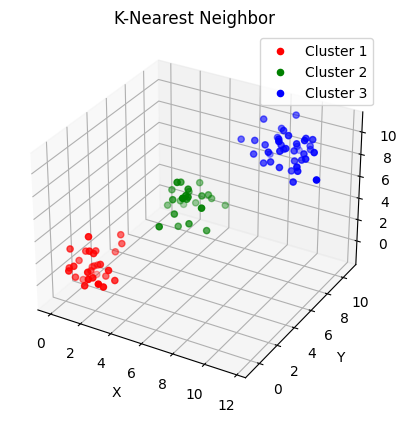

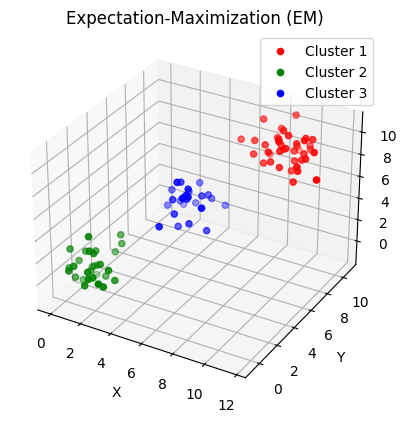

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Function to generate random data points from Gaussian distribution
def generate_data_points(mean, cov_matrix, num_points):
    return np.random.multivariate_normal(mean, cov_matrix, num_points)

# Function to shuffle the ground truth dataset
def shuffle_dataset(D1, D2, D3):
    dataset = np.concatenate((D1, D2, D3))
    labels = np.concatenate((np.zeros(len(D1)), np.ones(len(D2)), 2 * np.ones(len(D3))))
    idx = np.random.permutation(len(dataset))
    return dataset[idx], labels[idx]

# Define the parameters for the three Gaussian distributions
mu1 = np.array([1, 1, 1])
mu2 = np.array([5, 5, 5])
mu3 = np.array([9, 9, 9])

cov1 = np.diag([1, 1, 1])  # Covariance matrix for class 1
cov2 = np.diag([1, 1, 1])  # Covariance matrix for class 2
cov3 = np.diag([1, 1, 1])  # Covariance matrix for class 3

# Generate random data points
D1 = generate_data_points(mu1, cov1, 30)
D2 = generate_data_points(mu2, cov2, 25)
D3 = generate_data_points(mu3, cov3, 40)

# Shuffle the ground truth dataset
randomized_dataset, labels = shuffle_dataset(D1, D2, D3)

# Gaussian Mixture Model
start_time = time.time()
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(randomized_dataset)
gmm_labels = gmm.predict(randomized_dataset)
gmm_accuracy = accuracy_score(labels, gmm_labels)
gmm_time = time.time() - start_time

# Hierarchical Clustering
start_time = time.time()
hc = AgglomerativeClustering(n_clusters=3)
hc_labels = hc.fit_predict(randomized_dataset)
hc_accuracy = accuracy_score(labels, hc_labels)
hc_time = time.time() - start_time

# K-Nearest Neighbor
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(randomized_dataset, labels)
knn_labels = knn.predict(randomized_dataset)
knn_accuracy = accuracy_score(labels, knn_labels)
knn_time = time.time() - start_time

# Expectation-Maximization (EM) Algorithm
start_time = time.time()
em = GaussianMixture(n_components=3, random_state=42)
em.fit(randomized_dataset)
em_labels = em.predict(randomized_dataset)
em_accuracy = accuracy_score(labels, em_labels)
em_time = time.time() - start_time

# Function to plot 3D clusters
def plot_3d_clusters(dataset, labels, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = ['r', 'g', 'b']
    for i in range(3):
        ax.scatter(dataset[labels == i, 0], dataset[labels == i, 1], dataset[labels == i, 2], c=colors[i], label=f'Cluster {i+1}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()
    plt.show()

# Displaying results
print("Algorithm\tAccuracy\tTime (s)")
print("-----------------------------------")
print(f"GMM\t\t{gmm_accuracy:.4f}\t\t{gmm_time:.4f}")
print(f"Hierarchical\t{hc_accuracy:.4f}\t\t{hc_time:.4f}")
print(f"KNN\t\t{knn_accuracy:.4f}\t\t{knn_time:.4f}")
print(f"EM\t\t{em_accuracy:.4f}\t\t{em_time:.4f}")

# Plotting the results
plot_3d_clusters(randomized_dataset, gmm_labels, 'Gaussian Mixture Model')
plot_3d_clusters(randomized_dataset, hc_labels, 'Hierarchical Clustering')
plot_3d_clusters(randomized_dataset, knn_labels, 'K-Nearest Neighbor')
plot_3d_clusters(randomized_dataset, em_labels, 'Expectation-Maximization (EM)')


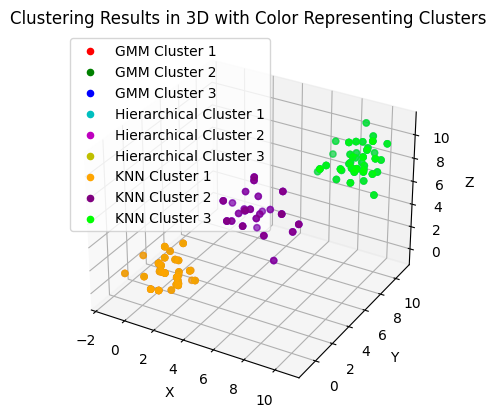

Algorithm	Accuracy	Time (s)
-----------------------------------
GMM		0.3158		0.0314
Hierarchical	0.2632		0.0097
KNN		1.0000		0.0418


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Function to generate random data points from Gaussian distribution
def generate_data_points(mean, cov_matrix, num_points):
    return np.random.multivariate_normal(mean, cov_matrix, num_points)

# Function to shuffle the ground truth dataset
def shuffle_dataset(D1, D2, D3):
    dataset = np.concatenate((D1, D2, D3))
    labels = np.concatenate((np.zeros(len(D1)), np.ones(len(D2)), 2 * np.ones(len(D3))))
    idx = np.random.permutation(len(dataset))
    return dataset[idx], labels[idx]

# Define the parameters for the three Gaussian distributions
mu1 = np.array([1, 1, 1])
mu2 = np.array([5, 5, 5])
mu3 = np.array([9, 9, 9])

cov1 = np.diag([1, 1, 1])  # Covariance matrix for class 1
cov2 = np.diag([1, 1, 1])  # Covariance matrix for class 2
cov3 = np.diag([1, 1, 1])  # Covariance matrix for class 3

# Generate random data points
D1 = generate_data_points(mu1, cov1, 30)
D2 = generate_data_points(mu2, cov2, 25)
D3 = generate_data_points(mu3, cov3, 40)

# Shuffle the ground truth dataset
randomized_dataset, labels = shuffle_dataset(D1, D2, D3)

# Gaussian Mixture Model
start_time = time.time()
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(randomized_dataset)
gmm_labels = gmm.predict(randomized_dataset)
gmm_accuracy = accuracy_score(labels, gmm_labels)
gmm_time = time.time() - start_time

# Hierarchical Clustering
start_time = time.time()
hc = AgglomerativeClustering(n_clusters=3)
hc_labels = hc.fit_predict(randomized_dataset)
hc_accuracy = accuracy_score(labels, hc_labels)
hc_time = time.time() - start_time

# K-Nearest Neighbor
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(randomized_dataset, labels)
knn_labels = knn.predict(randomized_dataset)
knn_accuracy = accuracy_score(labels, knn_labels)
knn_time = time.time() - start_time

# Plotting the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assign colors based on the cluster labels
colors_gmm = ['r', 'g', 'b']
colors_hc = ['c', 'm', 'y']
colors_knn = ['orange', 'purple', 'lime']

for i in range(3):
    ax.scatter(randomized_dataset[gmm_labels == i, 0],
               randomized_dataset[gmm_labels == i, 1],
               randomized_dataset[gmm_labels == i, 2],
               c=colors_gmm[i], label=f'GMM Cluster {i+1}')

for i in range(3):
    ax.scatter(randomized_dataset[hc_labels == i, 0],
               randomized_dataset[hc_labels == i, 1],
               randomized_dataset[hc_labels == i, 2],
               c=colors_hc[i], label=f'Hierarchical Cluster {i+1}')

for i in range(3):
    ax.scatter(randomized_dataset[knn_labels == i, 0],
               randomized_dataset[knn_labels == i, 1],
               randomized_dataset[knn_labels == i, 2],
               c=colors_knn[i], label=f'KNN Cluster {i+1}')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Clustering Results in 3D with Color Representing Clusters')
ax.legend()
plt.show()

# Displaying results
print("Algorithm\tAccuracy\tTime (s)")
print("-----------------------------------")
print(f"GMM\t\t{gmm_accuracy:.4f}\t\t{gmm_time:.4f}")
print(f"Hierarchical\t{hc_accuracy:.4f}\t\t{hc_time:.4f}")
print(f"KNN\t\t{knn_accuracy:.4f}\t\t{knn_time:.4f}")
